In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from itertools import product

## CV核心基础WEEK3 ：经典机器学习（一）
### Pipeline:
1. 监督学习与非监督学习
2. 第一个可训练的监督学习模型：线性回归模型的3类解法
3. 使用线性模型，解决字符分类问题
4. 逻辑回归模型

### 作业：
* 编写计算机视觉的第1版程序：用线性回归模型，解决数字图片分类问题，
* 要求：用pytorch 的auto_grad功能。

#### 步骤：
1. 生成10张图片，对应0,1,2,3,4,5,6,7,8,9.
2. 对这10张图片提取特征x。
3. 用一个线性判别器f(x)来决策输出结果y。
4. 判别器的训练要使用梯度下降法，写代码的时候要用到pytorch 的auto_grad功能。
  
  

#### 达到作用：
* 当x是 “0”图片对应的特征时，y=f(x)=0
...
* 当x是 “9”图片对应的特征时，y=f(x)=9
___ 

_可参考代码：_
- /week3/recognize_computer_vision_linear_model.py,线性模型解决图片识别问题课程代码
- /week3/how_to_use_auto_grad.py,测试pytorch auto_grad使用方法
- /week3/data_display.ipynb 数据显示
- /week3/week2作业答案课堂讲解.ipynb
- /week3/auto_grad使用时的注意事项.ipynb
- /week3/auto_grad形式的梯度下降.ipynb
- /week3/running_jupyter.pdf , jupyter运行命令
- jupyter常用效率快捷键：https://zhuanlan.zhihu.com/p/143919082


In [4]:
def generate_data():
    # 本函数生成0-9，10个数字的图片矩阵
    image_data=[]
    num_0 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_0)
    num_1 = torch.tensor(
    [[0,0,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_1)
    num_2 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,1,0,0,0],
    [0,1,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_2)
    num_3 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_3)
    num_4 = torch.tensor(
    [
    [0,0,0,0,1,0],
    [0,0,0,1,1,0],
    [0,0,1,0,1,0],
    [0,1,1,1,1,1],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_4)
    num_5 = torch.tensor(
    [
    [0,1,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,0,0,0,1,0],
    [0,1,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_5)
    num_6 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_6)
    num_7 = torch.tensor(
    [
    [0,1,1,1,1,0],
    [0,0,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_7)
    num_8 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_8)
    num_9 = torch.tensor(
    [[0,0,1,1,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,1,0],
    [0,1,0,0,1,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_9)
    image_label=[0,1,2,3,4,5,6,7,8,9]
    return image_data,image_label

In [5]:
def get_feature(x):
    return x.flatten().view(1,36).float()

In [6]:
def model(feature, weights):
    y = -1
    feature = torch.cat((feature, torch.tensor(1.0).view(1,1)), 1) # 连接两个张量，最后一个参数为1，代表列上叠加，为0，代表行上叠加
    y = torch.mm(feature, weights)
    return y

In [7]:
loss_fn = torch.nn.MSELoss() # 损失函数MSE

In [20]:
'''
对每幅图像做自动求导
'''
def linearRegression(image_data, image_labels, weights):
    epochs = 500
    loss_all = []
    for epoch in range(epochs):
        loss = 0
        for i in range(0, 10):
            feature = get_feature(image_data[i])
            y = model(feature, weights)
            label = torch.tensor(image_labels[i]).view(1,1).float()
            loss = loss_fn(y, label)
        loss /= 10.    
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * 0.005
            weights.grad.zero_()
        
        print("epoch=%s,loss=%s,weights=%s"%(epoch,loss,weights.view(37)))
        loss_all.append(loss)
        loss = 0
    return weights, loss_all

数字0对应的图片是:
tensor([[0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0]])
--------------------
数字8对应的图片是:
tensor([[0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0]])
--------------------
epoch=0,loss=tensor(10.3097, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -1.0316, -1.5517, -0.9819, -0.3903,  1.4698, -0.0171,
         0.5156,  0.6808, -0.0471, -0.6690, -0.8166, -0.5467,  0.4046,  1.1308,
         1.0617, -0.1752,  0.9318,  0.4721,  0.3970,  1.1915,  0.2813,  0.0125,
         0.0313, -2.3113, -0.2318,  0.8592,  0.1627, -0.7456, -0.6002, -0.5041,
         0.4109, -1.4059,  0.8151, -0.1190, -0.9155], grad_fn=<ViewBackward>)
epoch=1,loss=tensor(10.0637, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -1.0215, -1.5416, -0.9719, -0.3903,  1.4698, -0.0071

         0.4109, -1.4059,  0.8151, -0.1190, -0.3828], grad_fn=<ViewBackward>)
epoch=85,loss=tensor(1.3241, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -0.4952, -1.0153, -0.4455, -0.3903,  1.4698,  0.5193,
         0.5156,  0.6808,  0.4893, -0.6690, -0.8166, -0.5467,  0.9410,  1.6671,
         1.5981, -0.1752,  0.9318,  1.0085,  0.3970,  1.1915,  0.8177,  0.0125,
         0.0313, -2.3113, -0.2318,  0.8592,  0.6991, -0.7456, -0.6002, -0.5041,
         0.4109, -1.4059,  0.8151, -0.1190, -0.3792], grad_fn=<ViewBackward>)
epoch=86,loss=tensor(1.2925, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -0.4916, -1.0117, -0.4420, -0.3903,  1.4698,  0.5229,
         0.5156,  0.6808,  0.4929, -0.6690, -0.8166, -0.5467,  0.9446,  1.6707,
         1.6017, -0.1752,  0.9318,  1.0121,  0.3970,  1.1915,  0.8213,  0.0125,
         0.0313, -2.3113, -0.2318,  0.8592,  0.7027, -0.7456, -0.6002, -0.5041,
         0.4109, -1.4059,  0.8151, -0.1190, -0.3756], grad_fn=<ViewBackward>)
epoc

         0.4109, -1.4059,  0.8151, -0.1190, -0.1831], grad_fn=<ViewBackward>)
epoch=174,loss=tensor(0.1544, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -0.2979, -0.8180, -0.2483, -0.3903,  1.4698,  0.7166,
         0.5156,  0.6808,  0.6866, -0.6690, -0.8166, -0.5467,  1.1383,  1.8644,
         1.7954, -0.1752,  0.9318,  1.2058,  0.3970,  1.1915,  1.0150,  0.0125,
         0.0313, -2.3113, -0.2318,  0.8592,  0.8964, -0.7456, -0.6002, -0.5041,
         0.4109, -1.4059,  0.8151, -0.1190, -0.1819], grad_fn=<ViewBackward>)
epoch=175,loss=tensor(0.1507, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -0.2967, -0.8168, -0.2470, -0.3903,  1.4698,  0.7178,
         0.5156,  0.6808,  0.6878, -0.6690, -0.8166, -0.5467,  1.1395,  1.8657,
         1.7966, -0.1752,  0.9318,  1.2070,  0.3970,  1.1915,  1.0162,  0.0125,
         0.0313, -2.3113, -0.2318,  0.8592,  0.8976, -0.7456, -0.6002, -0.5041,
         0.4109, -1.4059,  0.8151, -0.1190, -0.1806], grad_fn=<ViewBackward>)
ep

         0.4109, -1.4059,  0.8151, -0.1190, -0.1162], grad_fn=<ViewBackward>)
epoch=260,loss=tensor(0.0194, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -0.2318, -0.7519, -0.1822, -0.3903,  1.4698,  0.7826,
         0.5156,  0.6808,  0.7527, -0.6690, -0.8166, -0.5467,  1.2044,  1.9305,
         1.8615, -0.1752,  0.9318,  1.2718,  0.3970,  1.1915,  1.0811,  0.0125,
         0.0313, -2.3113, -0.2318,  0.8592,  0.9625, -0.7456, -0.6002, -0.5041,
         0.4109, -1.4059,  0.8151, -0.1190, -0.1158], grad_fn=<ViewBackward>)
epoch=261,loss=tensor(0.0189, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -0.2314, -0.7515, -0.1817, -0.3903,  1.4698,  0.7831,
         0.5156,  0.6808,  0.7531, -0.6690, -0.8166, -0.5467,  1.2048,  1.9309,
         1.8619, -0.1752,  0.9318,  1.2723,  0.3970,  1.1915,  1.0815,  0.0125,
         0.0313, -2.3113, -0.2318,  0.8592,  0.9629, -0.7456, -0.6002, -0.5041,
         0.4109, -1.4059,  0.8151, -0.1190, -0.1153], grad_fn=<ViewBackward>)
ep

epoch=341,loss=tensor(0.0027, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -0.2092, -0.7293, -0.1596, -0.3903,  1.4698,  0.8052,
         0.5156,  0.6808,  0.7753, -0.6690, -0.8166, -0.5467,  1.2270,  1.9531,
         1.8841, -0.1752,  0.9318,  1.2944,  0.3970,  1.1915,  1.1037,  0.0125,
         0.0313, -2.3113, -0.2318,  0.8592,  0.9851, -0.7456, -0.6002, -0.5041,
         0.4109, -1.4059,  0.8151, -0.1190, -0.0932], grad_fn=<ViewBackward>)
epoch=342,loss=tensor(0.0027, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -0.2091, -0.7292, -0.1594, -0.3903,  1.4698,  0.8054,
         0.5156,  0.6808,  0.7754, -0.6690, -0.8166, -0.5467,  1.2271,  1.9533,
         1.8842, -0.1752,  0.9318,  1.2946,  0.3970,  1.1915,  1.1038,  0.0125,
         0.0313, -2.3113, -0.2318,  0.8592,  0.9852, -0.7456, -0.6002, -0.5041,
         0.4109, -1.4059,  0.8151, -0.1190, -0.0930], grad_fn=<ViewBackward>)
epoch=343,loss=tensor(0.0026, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  

epoch=427,loss=tensor(0.0003, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -0.2004, -0.7205, -0.1508, -0.3903,  1.4698,  0.8140,
         0.5156,  0.6808,  0.7841, -0.6690, -0.8166, -0.5467,  1.2358,  1.9619,
         1.8929, -0.1752,  0.9318,  1.3032,  0.3970,  1.1915,  1.1125,  0.0125,
         0.0313, -2.3113, -0.2318,  0.8592,  0.9939, -0.7456, -0.6002, -0.5041,
         0.4109, -1.4059,  0.8151, -0.1190, -0.0844], grad_fn=<ViewBackward>)
epoch=428,loss=tensor(0.0003, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  0.3978, -0.2004, -0.7205, -0.1507, -0.3903,  1.4698,  0.8141,
         0.5156,  0.6808,  0.7841, -0.6690, -0.8166, -0.5467,  1.2358,  1.9620,
         1.8929, -0.1752,  0.9318,  1.3033,  0.3970,  1.1915,  1.1125,  0.0125,
         0.0313, -2.3113, -0.2318,  0.8592,  0.9939, -0.7456, -0.6002, -0.5041,
         0.4109, -1.4059,  0.8151, -0.1190, -0.0843], grad_fn=<ViewBackward>)
epoch=429,loss=tensor(0.0003, grad_fn=<DivBackward0>),weights=tensor([ 0.6813,  

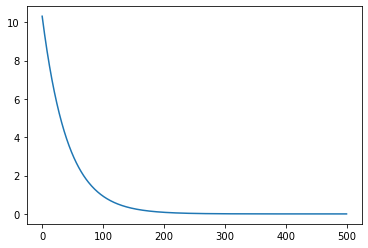

对每张图片进行识别
图像[0]得分类结果是:[tensor([[5]], dtype=torch.int32)],它得特征是[tensor([[0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
         0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])]
图像[1]得分类结果是:[tensor([[5]], dtype=torch.int32)],它得特征是[tensor([[0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]])]
图像[2]得分类结果是:[tensor([[2]], dtype=torch.int32)],它得特征是[tensor([[0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]])]
图像[3]得分类结果是:[tensor([[5]], dtype=torch.int32)],它得特征是[tensor([[0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])]
图像[4]得分类结果是:[tensor([[9]], dtype=torch.int32)],它得特征是[tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 

In [21]:
if __name__ == "__main__":
    weights = torch.randn((37,1), dtype=torch.float32, requires_grad=True)
    image_data, image_label = generate_data()
    
    # 打印出0的图像
    print("数字0对应的图片是:")
    print(image_data[0])
    print("-"*20)
    
    # 打印出8的图像
    print("数字8对应的图片是:")
    print(image_data[8])
    print("-"*20)
    
    # 模型训练
    weights , loss_all = linearRegression(image_data, image_label, weights)
    plt.figure()
    plt.plot(loss_all)
    plt.show()
    print("对每张图片进行识别")
    
    for i in range(0, 10):
        x = image_data[i]
        
        feature = get_feature(x)
        
        y = torch.floor((model(feature, weights) + 0.5)).int()
        print("图像[%s]得分类结果是:[%s],它得特征是[%s]"%(i,y,feature))